# Simple image processing

Menggunakan cv2 haar cascade untuk mendeteksi bentuk wajah manusia secara mudah dan simple.
Sebelumnya kita perlu mendownload haarcascade_frontalface_default.xml


# Instalasi library yang diperlukan


In [11]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2

Baca path gambar yang ingin diklasifikasikan

In [12]:
imagePath = 'frontalface.png'

In [13]:
img = cv2.imread(imagePath)

In [14]:
img.shape

(483, 528, 3)

In [15]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

LOAD THE CLASSIFIER

In [16]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [17]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

Drawing bounding box

In [18]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

DISPLAYING IMAGE

In [19]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 527.5, 482.5, -0.5)

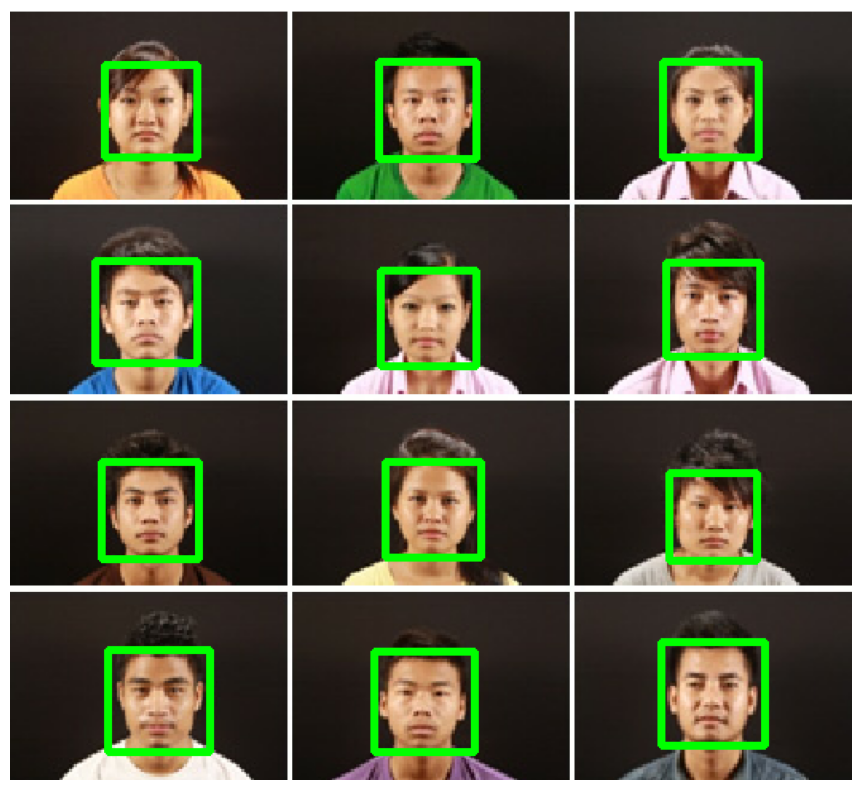

In [20]:
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

# Real time frontal-face detection

In [10]:
import cv2

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
video_capture = cv2.VideoCapture(0)
video_capture.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)

video_capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

True

In [11]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [12]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "Person Face Detection", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()